#                                      Global Power Plant Database


# Dataset Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.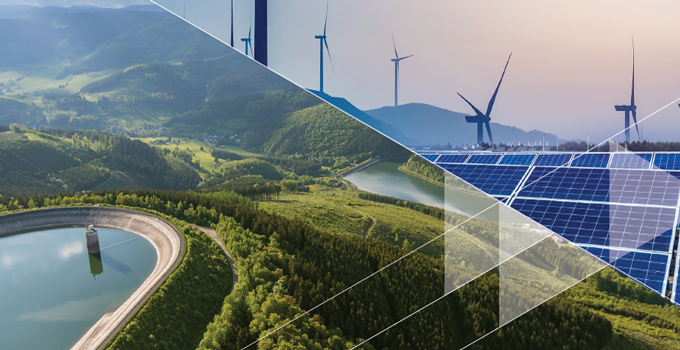


# Problem Statement 

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


# Attribute Information

# Reading and Understanding the Data¶

In [70]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
"""importing required libraries
Pandas is a useful library in data handling. 
Numpy library used for working with arrays. 
Seaborn/Matplotlib are used for data visualisation purpose. 
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation. 
"""
#importing required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

from subprocess import check_output


#from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

# Step 1 : Loading the Dataset

In [72]:
pow_plant_df = pd.read_csv("globalPowerPlant _Dataset.csv")

In [73]:
pow_plant_df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [74]:
pow_plant_df.shape

(907, 27)

In [75]:
pow_plant_df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Step : 2 Data Preparation & cleaning

In [76]:
pow_plant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Using the info() function a short summary of the global power plant dataframe is made and print the information about the dataframe including the index dtype and column dtypes,non-null values and memory usage.

In [77]:
pow_plant_df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

from above resources we are going to select 'country', 'country_long', 'name','capacity_mw','primary_fuel', 'other_fuel1', 'other_fuel2','other_fuel3', 'commissioning_year','year_of_capacity_data','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019', 'estimated_generation_gwh'

In [78]:
columns_selected = [ 'country', 'country_long', 'name','capacity_mw','primary_fuel', 'other_fuel1', 'other_fuel2', 'commissioning_year','year_of_capacity_data','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019']
len(columns_selected)


16

In [79]:
global_pow_df = pow_plant_df[columns_selected].copy()

Eighten selected columns are copied from data frame for review.

In [80]:
global_pow_df.describe()

,capacity_mw,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,527.000000,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,1997.091082,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,17.082868,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,1927.000000,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,1988.000000,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,2001.000000,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,2012.000000,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,2018.000000,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


In [81]:
global_pow_df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
primary_fuel               0
other_fuel1              709
other_fuel2              906
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2013      907
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
generation_gwh_2019      907
dtype: int64

In [82]:
global_pow_df.other_fuel1.nunique

<bound method IndexOpsMixin.nunique of 0      NaN
1      NaN
2      NaN
3      NaN
4      Oil
      ... 
902    Oil
903    NaN
904    NaN
905    NaN
906    NaN
Name: other_fuel1, Length: 907, dtype: object>

In [83]:
global_pow_df.other_fuel2.nunique

<bound method IndexOpsMixin.nunique of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
902    NaN
903    NaN
904    NaN
905    NaN
906    NaN
Name: other_fuel2, Length: 907, dtype: object>

Now we replacethe Nan values with 0

In [84]:
df = global_pow_df.replace(np.nan,0)

In [85]:
df.head(5)

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,IND,India,ACME Solar Tower,2.5,Solar,0,0,2011.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0
1,IND,India,ADITYA CEMENT WORKS,98.0,Coal,0,0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0
2,IND,India,AES Saurashtra Windfarms,39.2,Wind,0,0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0
3,IND,India,AGARTALA GT,135.0,Gas,0,0,2004.0,2019.0,0.0,617.789264,843.747,886.004428,663.774500,626.239128,0.0
4,IND,India,AKALTARA TPP,1800.0,Coal,Oil,0,2015.0,2019.0,0.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,0.0


# Step 3 : Exploratory Analysis and Visualization

In [86]:
df.country_long.nunique()

1

In [87]:
df.columns

Index(['country', 'country_long', 'name', 'capacity_mw', 'primary_fuel',
       'other_fuel1', 'other_fuel2', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')

# Fuel use in power plant.

In [88]:
main_primary_fuel = df.primary_fuel.value_counts() * 100 / df.primary_fuel.count()
main_primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

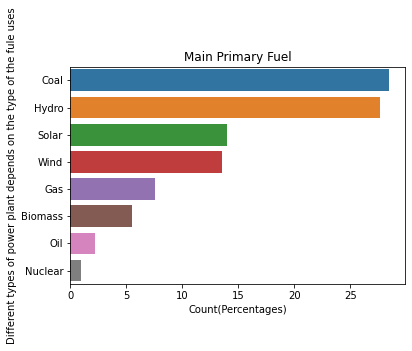

In [89]:
sns.barplot(x = main_primary_fuel, y= main_primary_fuel.index)
plt.title('Main Primary Fuel')
plt.xlabel('Count(Percentages)');
plt.ylabel('Different types of power plant depends on the type of the fule uses');

Thermal energy-based power plants have highest percentage that benefical to our future generation. Renewable energy-based power plants such as Hydro,Solar,Wind are beneficial to our future generation. 

# Type of power plant and their capacity

Text(0.5, 1.0, 'Type of power plant and capacity')

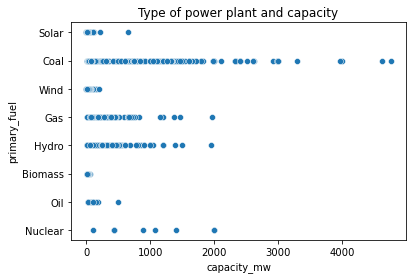

In [90]:
sns.scatterplot(x= df.capacity_mw, y = df.primary_fuel)
plt.title("Type of power plant and capacity")

In India thermal power plant is has  high-capacity. Nuclear power plant has lowest capacity.

<Figure size 1440x720 with 0 Axes>

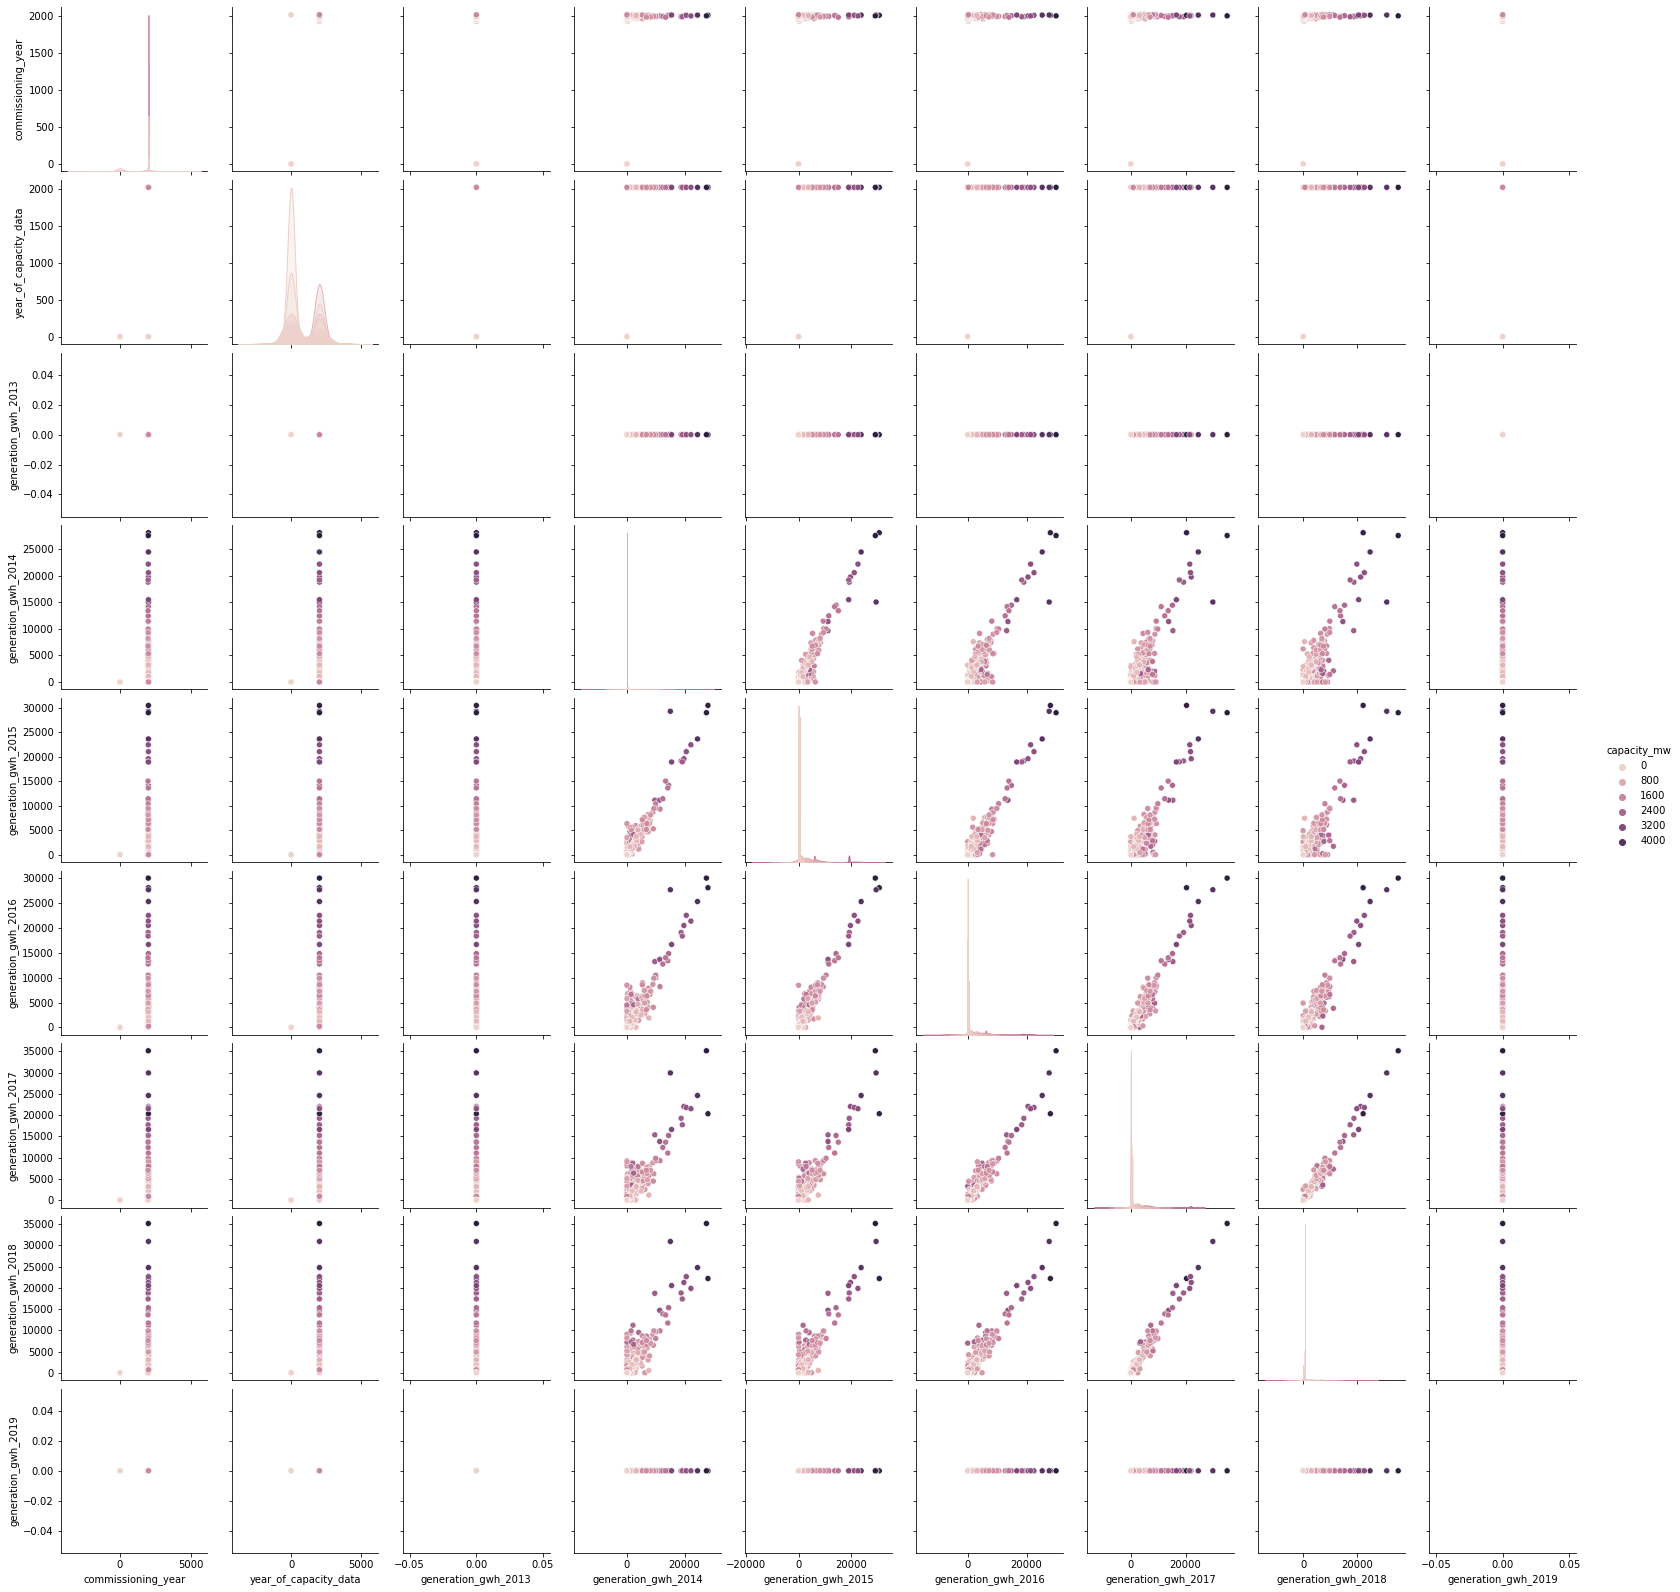

In [91]:
plt.figure(figsize = (20, 10))
lc = sns.pairplot(df, hue = "capacity_mw");

In [92]:
df.columns

Index(['country', 'country_long', 'name', 'capacity_mw', 'primary_fuel',
       'other_fuel1', 'other_fuel2', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')

<Figure size 1440x720 with 0 Axes>

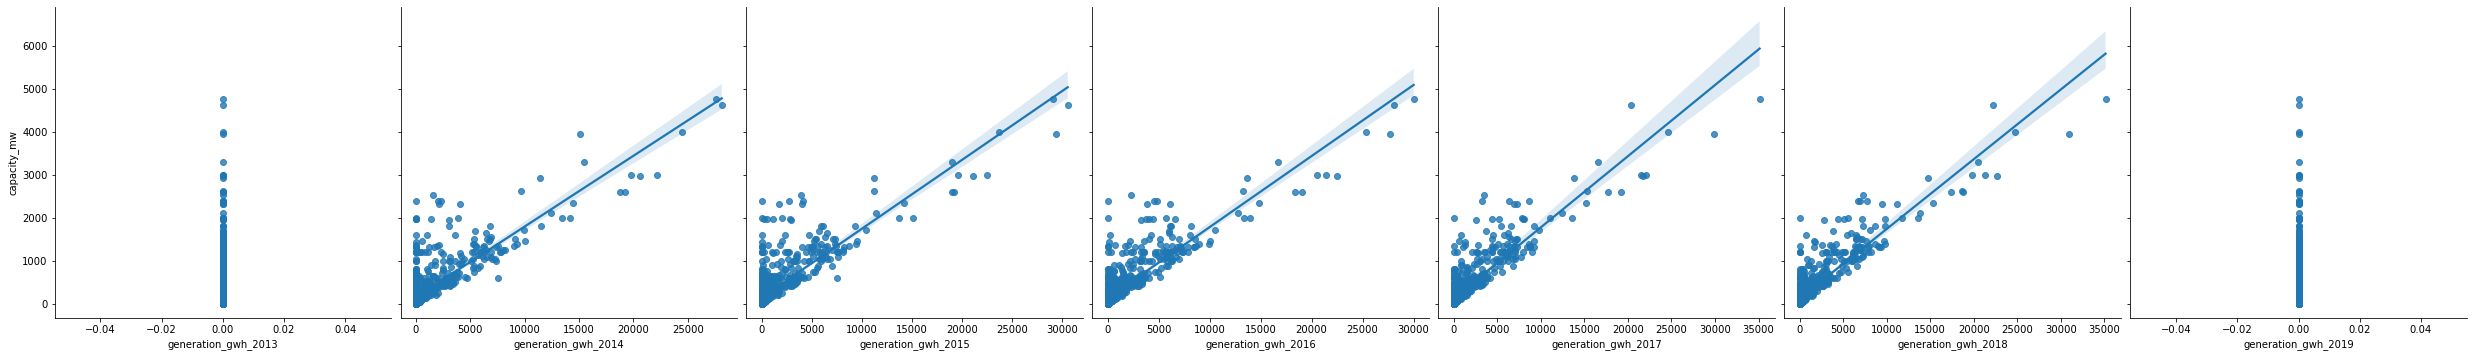

In [93]:
#Total Volume vs Small, Large and XLarge'
plt.figure(figsize = (20, 10))
sns.pairplot(df, x_vars=['generation_gwh_2013','generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019'], y_vars='capacity_mw', size=5, aspect=1, kind='reg')

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2018'}>,
        <AxesSubplot:title={'center':'generation_gwh_2019'}>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

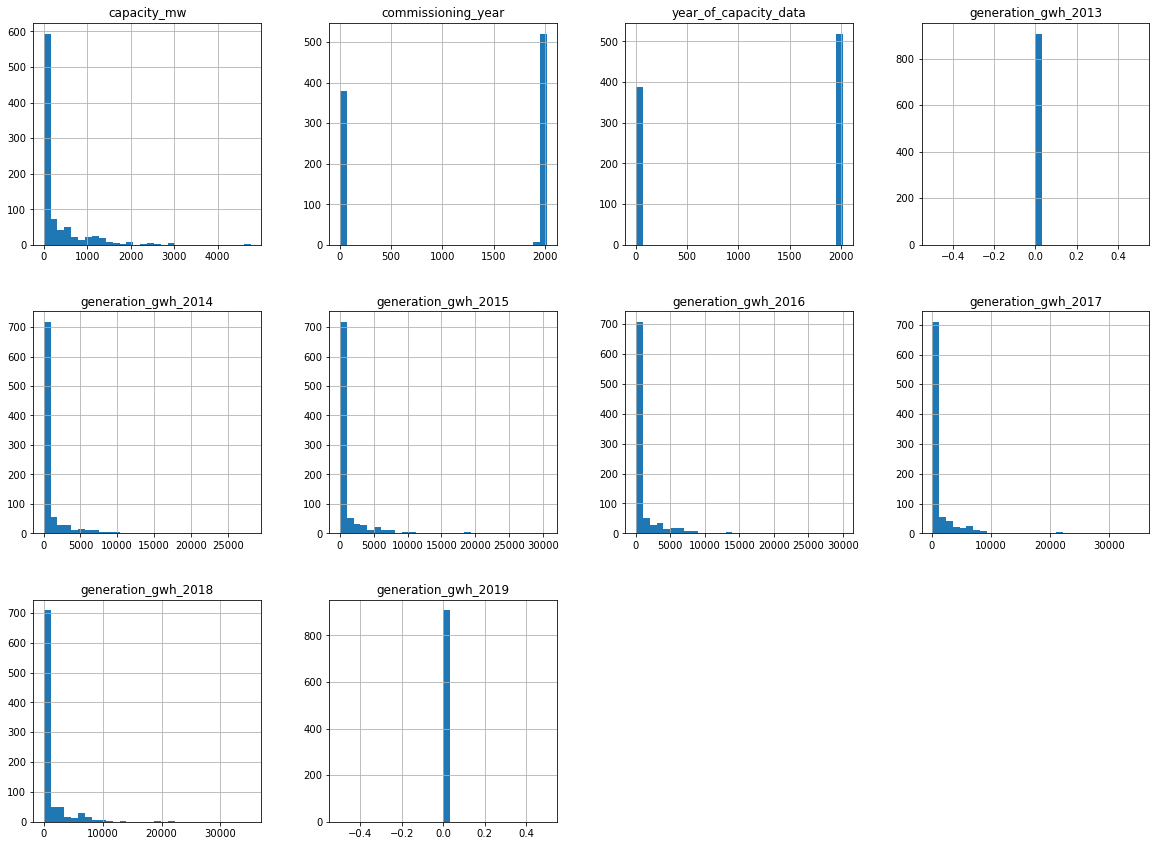

In [94]:
#Plotting histogram for univariate analysis and checking the Normal Distribution.
df.hist( grid=True, figsize=(20,20), layout=(4,4), bins=30)


In [95]:
df.head(4)

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,IND,India,ACME Solar Tower,2.5,Solar,0,0,2011.0,0.0,0.0,0.000000,0.000,0.000000,0.0000,0.000000,0.0
1,IND,India,ADITYA CEMENT WORKS,98.0,Coal,0,0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0000,0.000000,0.0
2,IND,India,AES Saurashtra Windfarms,39.2,Wind,0,0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0000,0.000000,0.0
3,IND,India,AGARTALA GT,135.0,Gas,0,0,2004.0,2019.0,0.0,617.789264,843.747,886.004428,663.7745,626.239128,0.0


# Step 4: Data PrePocessing Feature Engineering

Encoding Categorical Variables : Here 'primary_fuel' having categorical values using pandas get_dummies function to convert into numeric and  variables 'primary_fuel' converting into binary using label encoder.

In [96]:
le = LabelEncoder() # label encoder
df['primary_fuel'] = le.fit_transform(df['primary_fuel'])


#Converting two columns into binary
df = pd.get_dummies( df,drop_first = True )
pd.set_option('display.max_columns',100)  #To display all columns

In [97]:
df.head()

,capacity_mw,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,name_ADITYA CEMENT WORKS,name_AES Saurashtra Windfarms,name_AGARTALA GT,name_AKALTARA TPP,name_AKRIMOTA LIG,name_ALIYAR,name_ALLAIN DUHANGAN,name_ALMATTI DAM,name_AMAR KANTAK,name_AMARAVATI TPP,name_ANANDPUR SAHIB ST-I&II,"name_ANAPARA ""C""",name_ANDHRA,name_ANOOPGARH ST I&II,name_ANPARA,name_ANTA GT,name_ANUPPUR,name_ANUPUR TPP,name_ARVINDNAGAR SUGAR,name_ASHOKNAGAR MILL,name_ATHANI SUGAR,name_AURAIYA GT,name_AVANTHA BHANDAR TPP,name_AWARPUR CEMENT PLANT,name_Abhijeet,name_Amarsar Solar Power Plant,name_Anabura Wind Farm,name_Ananthapur - Meil Solar Power Plant,name_Andrha Lake Wind Farm,name_Anikkadavu Wind Farm,name_Arasinagundi Wind Farm,name_Askandra - DREPL Solar Power Plant,name_Askandra - Electromech Maritech Solar Power Plant,name_Askandra - Finehope Solar Power Plant,name_Askandra - Khaya Solar Power Plant,name_Askandra - Newton Solar Power Plant,name_Askandra - Saidham Solar Power Plant,name_Askandra - Vasavi Solar Power Plant,name_BADARPUR,...,name_UTRAN CCCP EXT,name_UTRAULA TPP,name_Udumalpet Wind Farm,name_VAIGAI DAM,name_VAITARNA,name_VALANTHARVI GT,name_VALLUR ntpc/ntecl,name_VALUTHUR GT,name_VARAHI,name_VARDHAM BUDNI,name_VARDHAM SATLAPUR,name_VASAVADATTA CEMENT,name_VEMAGIRI CCCP,name_VENUNAGAR SUGAR,name_VIJAIPUR WORKS,name_VIJAYWADA,name_VIJAYWADA TPP-IV,name_VIJESWARAM GT,name_VIKRAM CEMENT,name_VINDH_CHAL STPS,name_VIR,name_VISHNU PRAYAG,name_VIZAG TPP,name_VRL Wind Farm,name_Vaayu Ashti Wind Farm,name_Vankuswade Wind Farm,name_Vastan Solar Power Plant,name_WADI CEMENT PLANT,name_WANAKBORI,name_WARDHA WARORA(Sai Wardha Power),name_WARDHA WORKS,name_WARNA,name_WY.CANAL A -D,name_Wadgam Solar Power Plant,name_Warora Solar Power Plant,name_Weizzmann Forex Idukki Wind Farm,name_Wind power project by Riddhi Siddhi Gluco Biols Limited (RSGBL),name_Wind power project in Rajasthan,name_YAMUNANAGAR TPP,name_YASHWANTRAO MOHITE,name_YELHANKA (DG),name_YERMARUS TPP,name_Yelesandra Solar Power Plant,name_Yelisirur wind power project,name_ZAWAR MINES,name_iEnergy Theni Wind Farm,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil,other_fuel2_Oil
0,2.5,6,2011.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,98.0,1,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39.2,7,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,135.0,2,2004.0,2019.0,0.0,617.789264,843.747,886.004428,663.774500,626.239128,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1800.0,1,2015.0,2019.0,0.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Observation: Now data transform into numeric.

In [150]:
old_df = df

# Step 5 : Model building

In [98]:
#Now divide into dependent and independent variables.
X1 = df.drop(['primary_fuel'],axis=1)
y1 = df['primary_fuel']

In [100]:
df.index

RangeIndex(start=0, stop=907, step=1)

In [101]:
X2 = df.drop(['capacity_mw'],axis=1)
y2 = df['capacity_mw'] #Predictor variable

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=1)

print("X1 Train Shape ",X1_train.shape)
print("Y1 Train Shape ",y1_train.shape)

print("X1 Test Shape ",X1_test.shape)
print("Y1 Test Shape ",y1_test.shape)

print("\nX2 Train Shape ",X2_train.shape)
print("Y2 Train Shape ",y2_train.shape)

print("X2 Test Shape ",X2_test.shape)
print("Y2 Test Shape ",y2_test.shape)

X1 Train Shape  (725, 920)
Y1 Train Shape  (725,)
X1 Test Shape  (182, 920)
Y1 Test Shape  (182,)

X2 Train Shape  (725, 920)
Y2 Train Shape  (725,)
X2 Test Shape  (182, 920)
Y2 Test Shape  (182,)


In [122]:
knn1 = KNeighborsClassifier()

In [124]:
knn1.fit(X1_train,y1_train)

print("Models is trained........")

Models is trained........


In [127]:
print("knn classification score",knn1.score(X1_train,y1_train))

knn classification score 0.743448275862069


In [128]:
knn_conf_matrix = confusion_matrix(y1_test,knn1_ypred)
print("Confusion matrix for KNN_model",'\n',knn1_conf_matrix)

Confusion matrix for KNN_model 
 [[ 0  3  0  0  0  0  5  7]
 [ 1 37  3  9  0  0  2  4]
 [ 1  3  1  8  0  1  0  1]
 [ 0  1  0 50  0  1  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  3  0  0  0  0 16  1]
 [ 0  4  0  0  0  0  2 14]]


In [129]:
knn1_report = classification_report(y1_test,knn1_ypred)
print("knn classification_report",'\n',knn1_report)

knn classification_report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.69      0.66      0.67        56
           2       0.25      0.07      0.11        15
           3       0.75      0.96      0.84        52
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.64      0.80      0.71        20
           7       0.52      0.70      0.60        20

    accuracy                           0.65       182
   macro avg       0.35      0.40      0.37       182
weighted avg       0.57      0.65      0.60       182



In [141]:
lr = LogisticRegression() #Logistic regression
dt = DecisionTreeClassifier() #Decision tree classifier
svc = SVC()  #Support Vector Classifier


In [142]:
from sklearn.linear_model import LogisticRegression
lr.fit(X1_train,y1_train)
dt.fit(X1_train,y1_train)
svc.fit(X1_train,y1_train)
print("Model is trained........")

Model is trained........


In [143]:
print("Lr classification score",lr.score(X1_train,y1_train))
print("dt classification score",dt.score(X1_train,y1_train))
print("SVC classification score",svc.score(X1_train,y1_train))


Lr classification score 0.5558620689655173
dt classification score 1.0
SVC classification score 0.5448275862068965


In [144]:
#Model Evaluation
lr_ypred = lr.predict(X1_test)
dt_ypred = dt.predict(X1_test)

In [147]:
svc_ypred = svc.predict(X1_test)

In [145]:
lr_conf_matrix = confusion_matrix(y1_test,lr_ypred)
print("Confusion matrix for lr_model",'\n',lr_conf_matrix)

Confusion matrix for lr_model 
 [[ 0  0  0  0  0  0  0 15]
 [ 0 27  2 13  0  1  0 13]
 [ 0  2  0 11  0  0  0  2]
 [ 0  0  0 52  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  2 18]
 [ 0  0  0  0  0  0  0 20]]


In [146]:
dt_conf_matrix = confusion_matrix(y1_test,dt_ypred)
print("Confusion matrix for dt_model",'\n',dt_conf_matrix)

Confusion matrix for dt_model 
 [[ 0  2  0  0  0  0  5  8]
 [ 0 47  0  1  0  0  2  6]
 [ 1  2  5  5  0  1  0  1]
 [ 0  0  3 48  0  1  0  0]
 [ 0  0  0  1  1  0  0  0]
 [ 0  1  0  0  0  0  0  1]
 [ 1  2  0  0  0  0 16  1]
 [ 0  5  0  0  0  0  2 13]]


In [149]:
svc_conf_matrix = confusion_matrix(y1_test,svc_ypred)
print("Confusion matrix for svc_model",'\n',svc_conf_matrix)

Confusion matrix for svc_model 
 [[ 0  0  0  0  0  0 15  0]
 [ 0 27  0 16  0  0 13  0]
 [ 0  1  0 12  0  0  2  0]
 [ 0  0  0 52  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0 20  0]]


In [151]:
#Now divide into dependent and independent variables.
X2 = old_df.drop(['capacity_mw'],axis=1)
y2 = old_df['capacity_mw']

In [160]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()

y2_transformed = lab.fit_transform(y2)

#view transformed values
print(y2_transformed)


[  9 177 121 200 340 232 146 217 238 223 326 199 319  57  31 352 260 279
 319  36  58  77 285 279 131 135   1  56 135 190  66  47  19  19  19  19
  19  19  19 291  89 268 268 214 311 279 273 156  36 240 246  42 242  94
 146  67  67 319 125 292 170 323 170 232 194 240 155  19  67 234  75  52
  80  36  61 338  85 123 329  52  36 108  55  52 272  94  94  94  94 272
 240 167 163 320  36 179 272 159 279  22  67 272 223 294 122 146 210 294
 160 168 279   1   1  40  52  36  19  19  67  52 115  36   1   3  78 136
 204  19 178  10 122  15   1 146 240 276 228 122 111 229 194  36 282 353
 114  13 103 347 230 203 128 189  77  19 226  70  19 287 341 300 180 180
 336  79  94  77 307 319 319 107 138 272 279 237 244 278  73 175  19  54
  46 157  79 163  77  73 254  45 223 308  19  67 195   5 117  90  79  19
 195 180   1  52  74  31 274  40 158  67 163 346 264  16 241 120 298 111
  38 227 284  52 282 192 165 270 194  76  74 101 232 306  94 146  76 279
 221 276  79 295 143  52  82  10  19   1  19 135   

In [161]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_transformed, test_size=0.20, random_state=1)

print("X2 Train Shape ",X2_train.shape)
print("Y2 Train Shape ",y2_train.shape)

print("X2 Test Shape ",X2_test.shape)
print("Y2 Test Shape ",y2_test.shape)

X2 Train Shape  (725, 920)
Y2 Train Shape  (725,)
X2 Test Shape  (182, 920)
Y2 Test Shape  (182,)


In [162]:
knn1 = KNeighborsClassifier()
lr = LogisticRegression() #Logistic regression
dt = DecisionTreeClassifier() #Decision tree classifier
svc = SVC()  #Support Vector Classifier


In [163]:

from sklearn.linear_model import LogisticRegression
knn1.fit(X2_train,y2_train)
lr.fit(X2_train,y2_train)
dt.fit(X2_train,y2_train)
svc.fit(X2_train,y2_train)
print("Model is trained........")

Model is trained........


Model has been trained now checking for the accuracy:

In [165]:
print("Lr classification score",lr.score(X2_train,y2_train))
print("dt classification score",dt.score(X2_train,y2_train))
print("knn classification score",knn1.score(X2_train,y2_train))
print("SVC classification score",svc.score(X2_train,y2_train))

Lr classification score 0.16689655172413792
dt classification score 1.0
knn classification score 0.24551724137931036
SVC classification score 0.09241379310344827


Step 5: Model Evaluation

In [167]:
lr_ypred = lr.predict(X2_test)
dt_ypred = dt.predict(X2_test)
knn_ypred = knn1.predict(X2_test)
svc_ypred = svc.predict(X2_test)

In [168]:
lr_conf_matrix = confusion_matrix(y2_test,lr_ypred)
print("Confusion matrix for lr_model",'\n',lr_conf_matrix)

Confusion matrix for lr_model 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [169]:
dt_conf_matrix = confusion_matrix(y2_test,dt_ypred)
print("Confusion matrix for dt_model",'\n',dt_conf_matrix)

Confusion matrix for dt_model 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [170]:
knn_conf_matrix = confusion_matrix(y2_test,knn_ypred)
print("Confusion matrix for KNN_model",'\n',knn_conf_matrix)

Confusion matrix for KNN_model 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [172]:
svc_conf_matrix = confusion_matrix(y2_test,svc_ypred)
print("Confusion matrix for svc_model",'\n',svc_conf_matrix)

Confusion matrix for svc_model 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Checking Classification Report for each Model:
    

In [173]:
lr_report = classification_report(y2_test,lr_ypred)
print("lr classification_report",'\n',lr_report)

dt_report = classification_report(y2_test,dt_ypred)
print("dt classification_report",'\n',dt_report)

knn_report = classification_report(y2_test,knn_ypred)
print("knn classification_report",'\n',knn_report)

scv_report = classification_report(y2_test,svc_ypred)
print("scv classification_report",'\n',scv_report)


lr classification_report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.09      1.00      0.16         6
          22       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         9
          38       0.00      0.00      0.00         3
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
